Python Project 

In [158]:
#used to access twitter API
import tweepy
#used for sentiment analyzes 
from textblob import TextBlob
#used to create word cloud
from wordcloud import WordCloud
#analyze data 
import pandas as pd
#math operations
import numpy as np
#suports regular exp
import re 
#used to plot graphs
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [159]:

#df = pd.read_excel("/content/sample_data/california_housing_test.csv")
from google.colab import files
uploaded = files.upload()

In [160]:
log = pd.read_excel('twitterSentimentPythonKeys.xlsx')
log
consumerKey = log['API Key'][0]
consumerSecretKey = log['API Secret Key'][0]
accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]


In [161]:
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecretKey)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True )

In [168]:
#posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = "en", tweet_mode="extended")
global ticker
ticker = '$HOOD'
#result_type='popular'
posts = api.search(q= ticker, count = 100, lang = "en", tweet_mode="extended") 
#result = [[msg.full_text] for msg in posts]
result = [[msg.full_text] for msg in posts]
print(result)

[['Looks as though this will sail to the $70’s. Slightly regret selling in the 50’s, but will get back on tomorrow $hood'], ['RT @_a_j_e_m_y_: @Derrick_pl $vygvf cap of $2bill???? \nWould be a 22x to get to $hood\n33x to get to $coin\nAnd we know @investvoyager is &gt;&gt;&gt;'], ['RT @jrlachance: $HOOD Anyone hear if $AMC is going to pay a one penny dividend?  Anyone hear if $AMC if going to force a share recall?  All…'], ['RT @VolumePrintcess: Weekly Whisper Update: Day Trading can be Very Profitable following the Dark Pool #followthemoney $HooD https://t.co/h…'], ['$Hood https://t.co/AydRGkHnxv'], ['RT @Gilberto_TFC: The puzzle answers for this weekend is:  \n\n$FTCV options chain have a missing 🔗. Its the implied Vol relative to $COIN ea…'], ['$DSA $KODK $TTCF $GNUS $IDEX $boxl $BABA $TSLA $TAOP $JFK $CEMI $SPY $TTCM $SHOP $AMZN $NVDA $ROKU $EBAY $AMD $BB $DAL $DOW $HOOD $AAPL $ESE $SPCE $FCEL $TRIP $BYND $MRNA $NOK $OXY $CCL $CRM $DGLY $HTZ $HD $GMBL $FB \n\noptions alerts 90% suc

In [169]:
#Create a dataframe with column Tweets
df = pd.DataFrame([msg.full_text for msg in posts], columns = ['Tweets'])
#prints top 5
#df.head()
df 

,Tweets
0,Looks as though this will sail to the $70’s. S...
1,RT @_a_j_e_m_y_: @Derrick_pl $vygvf cap of $2b...
2,RT @jrlachance: $HOOD Anyone hear if $AMC is g...
3,RT @VolumePrintcess: Weekly Whisper Update: Da...
4,$Hood https://t.co/AydRGkHnxv
...,...
95,Who’s ready for tomorrow? $LOTZ will sky rock ...
96,Top 10 most mentioned stocks on WSB via @Quive...
97,RT @InsidrFinancial: Weekend article on $BTBT ...
98,"After finding out what I do for a living, my h..."


In [170]:
#Clean the text 


#Create a function to clean the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+' ,'', text) # Remove @mentions
  text = re.sub(r'#', '', text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
  return text

  # Cleaning the text 
df['Tweets'] = df['Tweets'].apply(cleanText)

#show cleaned text 
df



,Tweets
0,Looks as though this will sail to the $70’s. S...
1,@_a_j_e_m_y_: _pl $vygvf cap of $2bill???? \nW...
2,: $HOOD Anyone hear if $AMC is going to pay a ...
3,: Weekly Whisper Update: Day Trading can be Ve...
4,$Hood
...,...
95,Who’s ready for tomorrow? $LOTZ will sky rock ...
96,Top 10 most mentioned stocks on WSB via 👀\n\n...
97,: Weekend article on $BTBT $CLWD $CYBL $HOOD \...
98,"After finding out what I do for a living, my h..."


In [171]:
#polarity: negative vs. positive    (-1.0 => +1.0)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 

#subjectivity: objective vs. subjective (+0.0 => +1.0)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df





,Tweets,Subjectivity,Polarity
0,Looks as though this will sail to the $70’s. S...,0.083333,-0.083333
1,@_a_j_e_m_y_: _pl $vygvf cap of $2bill???? \nW...,0.000000,0.000000
2,: $HOOD Anyone hear if $AMC is going to pay a ...,0.000000,0.000000
3,: Weekly Whisper Update: Day Trading can be Ve...,0.266667,0.016667
4,$Hood,0.000000,0.000000
...,...,...,...
95,Who’s ready for tomorrow? $LOTZ will sky rock ...,0.500000,0.200000
96,Top 10 most mentioned stocks on WSB via 👀\n\n...,0.533333,0.466667
97,: Weekend article on $BTBT $CLWD $CYBL $HOOD \...,0.600000,1.000000
98,"After finding out what I do for a living, my h...",0.420000,0.130000


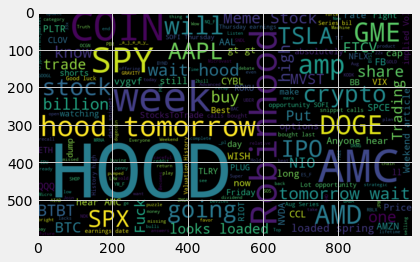

In [172]:
# Plot Word Cloud 
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 1000, height = 600, random_state= 21, max_font_size = 200).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")

In [173]:
#Compute negative, neutral, and positive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Looks as though this will sail to the $70’s. S...,0.083333,-0.083333,Negative
1,@_a_j_e_m_y_: _pl $vygvf cap of $2bill???? \nW...,0.000000,0.000000,Neutral
2,: $HOOD Anyone hear if $AMC is going to pay a ...,0.000000,0.000000,Neutral
3,: Weekly Whisper Update: Day Trading can be Ve...,0.266667,0.016667,Positive
4,$Hood,0.000000,0.000000,Neutral
...,...,...,...,...
95,Who’s ready for tomorrow? $LOTZ will sky rock ...,0.500000,0.200000,Positive
96,Top 10 most mentioned stocks on WSB via 👀\n\n...,0.533333,0.466667,Positive
97,: Weekend article on $BTBT $CLWD $CYBL $HOOD \...,0.600000,1.000000,Positive
98,"After finding out what I do for a living, my h...",0.420000,0.130000,Positive


In [174]:
# sortedDF = df.sort_values(by=['Polarity'])
# sortedDF

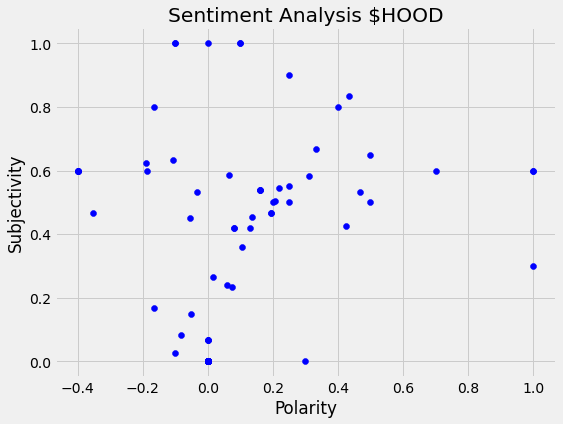

,Tweets,Subjectivity,Polarity,Analysis
0,Looks as though this will sail to the $70’s. S...,0.083333,-0.083333,Negative
1,@_a_j_e_m_y_: _pl $vygvf cap of $2bill???? \nW...,0.000000,0.000000,Neutral
2,: $HOOD Anyone hear if $AMC is going to pay a ...,0.000000,0.000000,Neutral
3,: Weekly Whisper Update: Day Trading can be Ve...,0.266667,0.016667,Positive
4,$Hood,0.000000,0.000000,Neutral
...,...,...,...,...
95,Who’s ready for tomorrow? $LOTZ will sky rock ...,0.500000,0.200000,Positive
96,Top 10 most mentioned stocks on WSB via 👀\n\n...,0.533333,0.466667,Positive
97,: Weekend article on $BTBT $CLWD $CYBL $HOOD \...,0.600000,1.000000,Positive
98,"After finding out what I do for a living, my h...",0.420000,0.130000,Positive


In [175]:
#@title
#plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis '+ ticker)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
df

In [176]:
#@title
totalCount = len(df)
positiveTweets = df[df.Analysis == 'Positive']
negativeTweets = df[df.Analysis == 'Negative']
neutralTweets = df[df.Analysis == 'Neutral']

positivePercent = round(((len(positiveTweets))/totalCount*100),1)
negativePercent = round(((len(negativeTweets))/totalCount*100),1)
nneutralPercent = round(((len(neutralTweets))/totalCount*100),1)


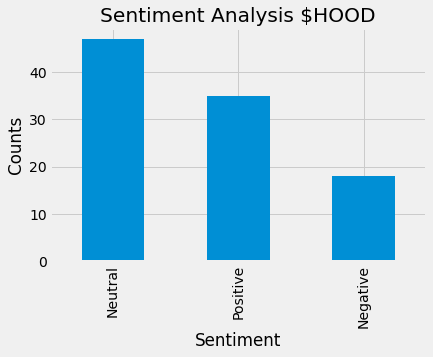

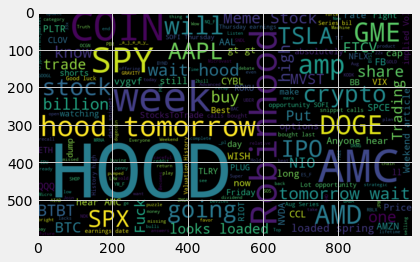

In [177]:
#@title
df['Analysis'].value_counts()
plt.title('Sentiment Analysis ' + ticker)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')

plt.show()
plt.imshow(wordCloud, interpolation="bilinear")